**Chapter_3**  
**ATMOS 5040: Environmental Statistics**  
**John Horel **

Download this notebook and all images and data by downloading the ZIP file from GitHub, or use the git command:

    git clone https://github.com/johnhorel/ATMOS_5040_2019.git
    
> Note: Windows users will have to install [git for Windows](https://gitforwindows.org/) and execute the git command from the PowerShell.

# Using Python modules

`numpy` provides routines to handle arrays and many calculations efficiently and imported by convention as `np`. Numpy functions are very good at handling homogeneous data arrays (and similar in that respect to matlab functions).

`pandas` is really good at handling tabular/array data that may have heterogeneous types (floating and text, for example). It is imported by convention as `pd`. 

There are a couple sets of panda library routines  (`Series`, and `DataFrame`) used so frequently that we'll import those directly too.

`scipy` has a bunch of statistical functions and we'll import `stats` from `scipy`



`pyplot` is a _submodule_ of matplotlib. It is typically imported as the alias `plt` to handle basic plotting

In [18]:
#Aaron Test Git Push
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib_venn import venn2,venn3

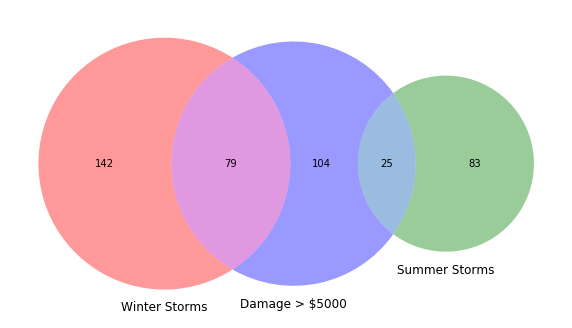

In [19]:
plt.figure(figsize=(10,10))
#python venn: A,B,A and B,C,A and C,B and C,A and B and C
v = venn3(subsets=(142, 83, 0, 104, 79, 25, 0), set_labels = ('Winter Storms', 'Summer Storms', 'Damage > $5000'))
plt.savefig('figure_3.1_2019_python.png')

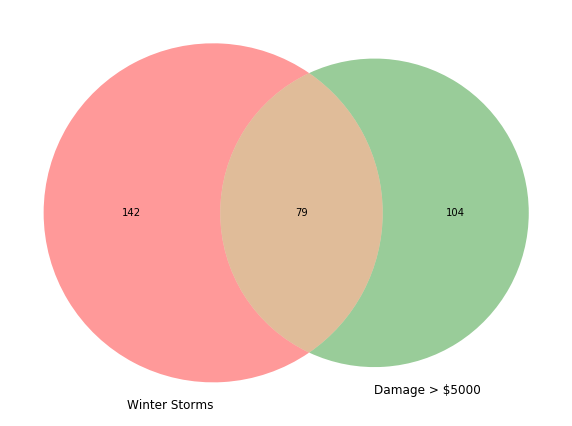

In [20]:
#figure 3.3
plt.figure(figsize=(10,10))
#python venn: A,B,A and B
# for demonstrating union of two types of occurrences
v = venn2(subsets=(142, 104, 79), set_labels = ('Winter Storms', 'Damage > $5000'))
plt.savefig('figure_3.3_2019_python.png')

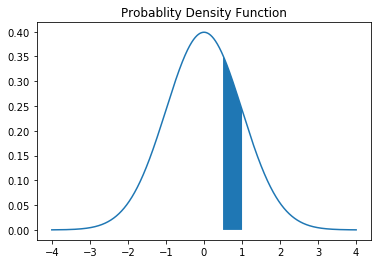

In [21]:
#figure 3.5 
title = "Probablity Density Function"
mu = 0
sigma = 1
x = np.arange(-4,4,0.001)
y = stats.norm.pdf(x, mu, sigma)
z0 = 0.5
z1 = 1
cond = (z0<x)&(x<z1)
z = x[cond]

fig,ax = plt.subplots()
ax.plot(x, y)
ax.fill_between(z, 0, stats.norm.pdf(z, mu, sigma))
ax.set_title(title)

plt.savefig('figure_3.5_2019_python.png')

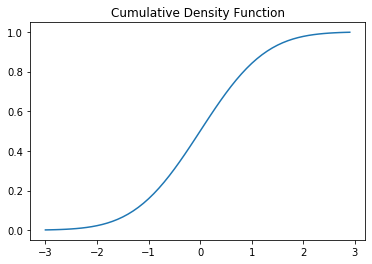

In [22]:
#figure 3.6
x = np.arange(-3,3,0.1)
fig,ax = plt.subplots()
ax.plot(x,stats.norm.cdf(x,0,1))
ax.set_title("Cumulative Density Function")

plt.savefig('figure_3.6_2019_python.png')

empirical: mean and standard deviation 1279.8 1.19 (m)
gaussian fit: mean and standard deviation 1279.8 1.19 (m)


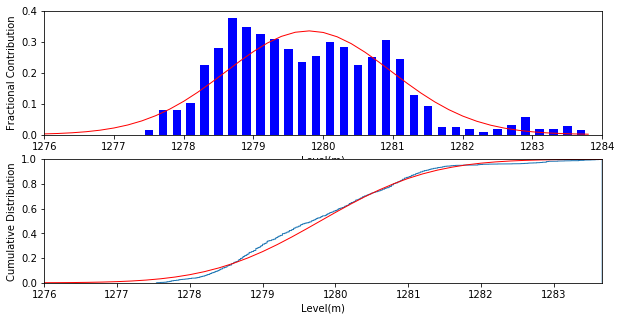

In [23]:
#figure 3.7
# plot gaussian fits to pdf and cdf of lake level

#read and then convert lake level to meters
levmon = .3048 * np.genfromtxt('../data/gsl_monthly.csv', delimiter=',', usecols=2)

fig2,(ax1,ax2) = plt.subplots(2,1,figsize=(10,5))

#get total number of values
N = len(levmon)
#set range
x = np.arange(1276,1284,0.2)
#doing as fractional contributions 
#which means probability is width (0.2)* fractional contribution
hist_val,bins = np.histogram(levmon,x,density=True)
width = 0.6 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
ax1.bar(center,hist_val,align='center',width=width,color='blue')
ax1.set(xlim=(1276,1284),ylim=(0,0.4))
ax1.set(xlabel="Level(m)",ylabel='Fractional Contribution')

#empirical values
#mean
levm = np.mean(levmon)
# unbiased estimate of pop standard deviation 
stdl = np.std(levmon,ddof=1,axis=0)

# gaussian fit to monthly lake level
(mu_g, sigma_g) = stats.norm.fit(levmon)

print("empirical: mean and standard deviation %.1f %.2f (m)" % (levm,stdl))
print("gaussian fit: mean and standard deviation %.1f %.2f (m)" % (mu_g,sigma_g))

# add a gaussian fit line for pdf
y1 = stats.norm.pdf( bins, mu_g, sigma_g)
ax1.plot(bins, y1, 'r', linewidth=1)

# plot the cumulative histogram
n2, bins2, patches = ax2.hist(levmon, N, density='True', histtype='step',
                           cumulative=True, label='Empirical')
ax2.set(xlim=(1276,max(levmon)),ylim=(0,1.0))
ax2.set(xlabel="Level(m)",ylabel='Cumulative Distribution')

# add a gaussian fit line for cdf
y2 = stats.norm.cdf(x, mu_g, sigma_g)
ax2.plot(bins, y2, 'r', linewidth=1)
plt.savefig('figure_3.7_2019_python.png')



In [24]:
#read the collins air temperature data
cln = np.genfromtxt('../data/alta_stns.dat',usecols=6)
print(cln)

[-6.1 -6.7 -2.2 ...  0.   0.   0. ]


empirical: mean and standard deviation -5.1 5.90 (m)
gaussian fit: mean and standard deviation -5.1 5.90 (m)


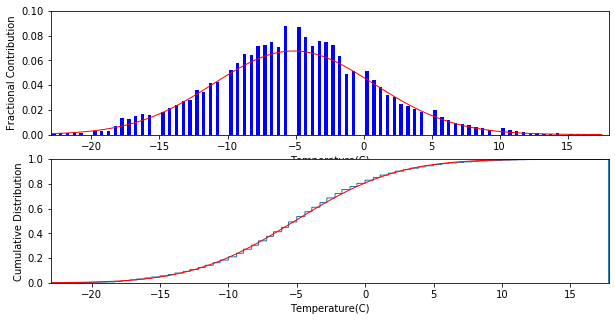

In [25]:
#figure 3.8
# plot gaussian fits to pdf and cdf of Collins Alta temperature
#empirical values
#mean
clnm = np.mean(cln)
# unbiased estimate of pop standard deviation 
stdc = np.std(cln,ddof=1,axis=0)

# gaussian fit to monthly lake level
(mu_gc, sigma_gc) = stats.norm.fit(cln)

print("empirical: mean and standard deviation %.1f %.2f (m)" % (clnm,stdc))
print("gaussian fit: mean and standard deviation %.1f %.2f (m)" % (mu_gc,sigma_gc))


fig8,(ax1,ax2) = plt.subplots(2,1,figsize=(10,5))

#get total number of values
Nc = len(cln)
#set range
xc = np.arange(-23,18,0.5)
#doing as fractional contributions 
#which means probability is width (0.5)* fractional contribution
hist_valc,binsc = np.histogram(cln,xc,density=True)
widthc = 0.5 * (binsc[1] - binsc[0])
centerc = (binsc[:-1] + binsc[1:]) / 2
ax1.bar(centerc,hist_valc,align='center',width=widthc,color='blue')
ax1.set(xlim=(-23,18),ylim=(0,0.1))
ax1.set(xlabel="Temperature(C)",ylabel='Fractional Contribution')


# add a gaussian fit line for pdf
y1c = stats.norm.pdf( binsc, mu_gc, sigma_gc)
ax1.plot(binsc, y1c, 'r', linewidth=1)

# plot the cumulative histogram
n2c, bins2c, patches = ax2.hist(cln, Nc, density='True', histtype='step',
                           cumulative=True, label='Empirical')
ax2.set(xlim=(-23,max(cln)),ylim=(0,1.0))
ax2.set(xlabel="Temperature(C)",ylabel='Cumulative Distribution')

# add a gaussian fit line for cdf
y2c = stats.norm.cdf(xc, mu_gc, sigma_gc)
ax2.plot(binsc, y2c, 'r', linewidth=1)
plt.savefig('figure_3.8_2019_python.png')




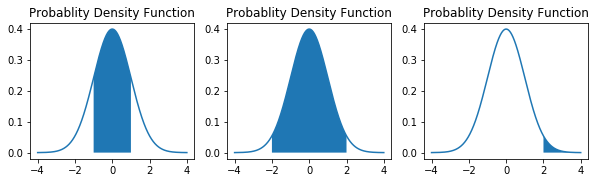

In [26]:
#figure 3.9

fig9,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(10,2.5))
title = "Probablity Density Function"
mu = 0
sigma = 1
x = np.arange(-4,4,0.001)
y = stats.norm.pdf(x, mu, sigma)
z0 = -1
z1 = 1
cond = (z0<x)&(x<z1)
z = x[cond]

ax1.plot(x, y)
ax1.fill_between(z, 0, stats.norm.pdf(z, mu, sigma))
ax1.set_title(title)

z0 = -2
z1 = 2
cond = (z0<x)&(x<z1)
z = x[cond]
ax2.plot(x, y)
ax2.fill_between(z, 0, stats.norm.pdf(z, mu, sigma))
ax2.set_title(title)

z0 = 2
z1 = 10
cond = (z0<x)&(x<z1)
z = x[cond]
ax3.plot(x, y)
ax3.fill_between(z, 0, stats.norm.pdf(z, mu, sigma))
ax3.set_title(title)


plt.savefig('figure_3.9_2019_python.png')

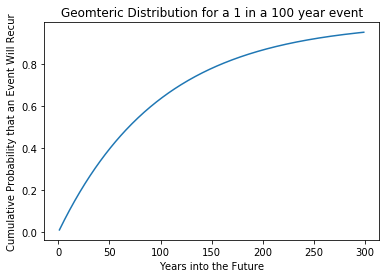

In [27]:
#figure 3.10
x = np.arange(1,300,1)
fig,ax = plt.subplots()
ax.plot(x,stats.geom.cdf(x,0.01,loc=0))
ax.set_title("Geomteric Distribution for a 1 in a 100 year event")
ax.set(xlabel="Years into the Future",ylabel='Cumulative Probability that an Event Will Recur')
plt.savefig('figure_3.10_2019_python.png')


25521.0 524099.9999999995


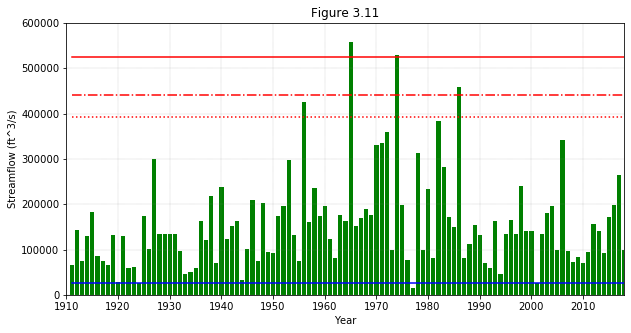

In [28]:
# figure 11
#read annual peak streamflows of klamath river
year =  np.genfromtxt('../data/klamath_river_streamflow.csv', delimiter=',', usecols=0)
flow =  np.genfromtxt('../data/klamath_river_streamflow.csv', delimiter=',', usecols=1)


#plot time series
decade_ticks = np.arange(1910,2020,10)

fig,ax = plt.subplots(1,1,figsize=(10,5))
ax.bar(year,flow,color='green')
ax.set(xlim=(1911,2018),ylim=(0,600000))
ax.set(xlabel="Year",ylabel='Streamflow (ft^3/s)')
ax.set(xticks=decade_ticks)
ax.set(title="Figure 3.11")
ax.grid(linestyle='--', color='grey', linewidth=.2)
#compute first and 99th percentile for extreme values determined empirically
p01 = np.percentile(flow,1)
p99 = np.percentile(flow,99)
print(p01,p99)
xv = [1911,2018]
ax.plot(xv,[p99,p99],'r')
ax.plot(xv,[p01,p01],'b')
#from below, get the gaussian and weibull 99th percentiles
#gaussian
ax.plot(xv,[392896,392896],'r:')
#weibull
ax.plot(xv,[441410,441410],'r-.')

plt.savefig('figure_11_2019_python.png')


empirical: mean and standard deviation 156774.1 101972.13 (m)
gaussian fit: mean and standard deviation 156774.1 101498.94 (m)
gaussian 99th 392895.9117075348
shape: 1.6657715673814353
scale: 176474.02478746616
weibull 99th 441409.86767725844
[0.         0.02624219 0.08091261 0.15276891 0.23486641 0.32174189
 0.40903466 0.49337759 0.57232115 0.64424152 0.70822742 0.76395287
 0.81154641 0.85146575 0.88438533 0.91110108 0.9324542  0.94927418
 0.96233911 0.97235116 0.97992408 0.98557992 0.98975222 0.99279336
 0.99498415 0.99654436 0.99764308 0.99840835 0.99893562 0.99929508]


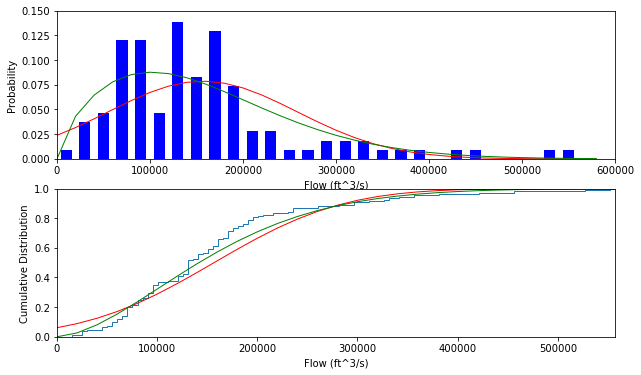

In [29]:
#figure 3.12



# plot gaussian fits to pdf and cdf of streamflow
#empirical values
#mean
flowm = np.mean(flow)
# unbiased estimate of pop standard deviation 
stdf = np.std(flow,ddof=1,axis=0)

# gaussian fit to flow
(mu_gf, sigma_gf) = stats.norm.fit(flow)

print("empirical: mean and standard deviation %.1f %.2f (m)" % (flowm,stdf))
print("gaussian fit: mean and standard deviation %.1f %.2f (m)" % (mu_gf,sigma_gf))

fig11,(ax1,ax2) = plt.subplots(2,1,figsize=(10,6))
#display probabilities
#get total number of values
Nf = len(flow)
#set range
xf = np.arange(0,600000,20000)

#doing as fractional contributions 
#which means probability is width (20000)* fractional contribution
hist_valf,binsf = np.histogram(flow,xf,density=True)
#scale for probability
hist_valf = 20000*hist_valf

width = 0.6 * (binsf[1] - binsf[0])
centerf = (binsf[:-1] + binsf[1:]) / 2
ax1.bar(centerf,hist_valf,align='center',width=width,color='blue')
ax1.set(xlim=(0,600000),ylim=(0,0.15))
ax1.set(xlabel="Flow (ft^3/s)",ylabel='Probability')

# add a gaussian fit line for pdf
ygf = stats.norm.pdf( binsf, mu_gf, sigma_gf)
#scale for probability
ygf = 20000*ygf
ax1.plot(binsf, ygf, 'r', linewidth=1)

#for  fig 3.11, determine the 99th percentile for a gaussian
p99g = stats.norm.ppf(.99, loc=mu_gf,scale=sigma_gf)

print('gaussian 99th',p99g)


# add a weibull fit line for pdf
#this is not very intuitive but due to some painful hacking
params = stats.exponweib.fit(flow, floc=0, f0=1)
shape = params[1]
scale = params[3]
print ('shape:',shape)
print ('scale:',scale)
ywf = stats.exponweib.pdf(binsf,*params)
#scale for probability
ywf = 20000*ywf
ax1.plot(binsf, ywf, 'g', linewidth=1)

#for  fig 3.11, determine the 99th percentile
p99w = scale * (-np.log(1-0.99))**(1/shape);

print('weibull 99th',p99w)


# plot the cumulative histogram
N = len(flow)
n2f, bins2f, patches = ax2.hist(flow, N, density='True', histtype='step',
                           cumulative=True, label='Empirical')
ax2.set(xlim=(0,max(flow)),ylim=(0,1.0))
ax2.set(xlabel="Flow (ft^3/s)",ylabel='Cumulative Distribution')

# add a gaussian fit line for cdf
y2f = stats.norm.cdf(xf, mu_gf, sigma_gf)
ax2.plot(binsf, y2f, 'r', linewidth=1)
plt.savefig('figure_3.12_2019_python.png')

# add a weibull fit line for cdf
ywf = stats.exponweib.cdf(binsf,*params)
print(ywf)
ax2.plot(binsf, ywf, 'g', linewidth=1)




## 

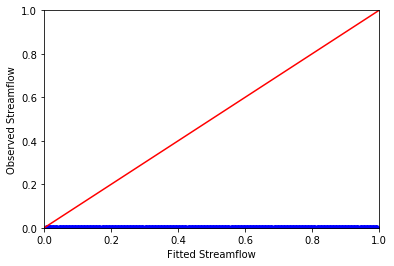

In [30]:
import statsmodels.api as sm

wfv = stats.exponweib.cdf(flow,*params)
pp_x = sm.ProbPlot(wfv, fit=True)

pp_x.ppplot(other=flow, line='45',xlabel='Fitted Streamflow',ylabel='Observed Streamflow')
plt.savefig('figure_3.13_2019_python.png')


-16.372 5.972


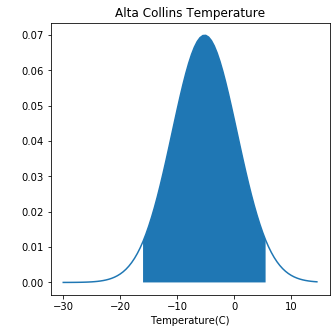

In [31]:
#figure 3.14

fig14,ax = plt.subplots(figsize=(5,5))
title = "Alta Collins Temperature"
mu = -5.2
sigma = 5.7
x = np.arange(-30,15,0.5)
y = stats.norm.pdf(x, mu, sigma)
z0 = mu - 1.96 * sigma
z1 = mu + 1.96 * sigma
print(z0,z1)
cond = (z0<x)&(x<z1)
z = x[cond]
ax.plot(x, y,)
ax.set(xlabel="Temperature(C)",ylabel=' ')
ax.fill_between(z, 0, stats.norm.pdf(z, mu, sigma))
ax.set_title(title)

plt.savefig('figure_3.14_2019_python.png')


In [32]:
#figure 15 was done some time ago and not repeated here
#figure 16 is from  central_limit.ipynb

In [33]:
#figure 17,18
yearp = np.genfromtxt('../data/utah_precip.csv', delimiter=',', usecols=0)
ppt = 2.54 * np.genfromtxt('../data/utah_precip.csv', delimiter=',', usecols=1)
decade_ticks = np.arange(1900,2020,10)
pmean = np.mean(ppt)
ppta = ppt - pmean
npa = len(ppta)
# sample standard deviation and variance
ps = np.std(ppta)
# sample std deviation if central limit valid for 5 years
ps5 = ps /np.sqrt(5)
print(npa,pmean,ps,ps5)
#print("tick marks",decade_ticks)

124 34.068569354838715 6.34290005775034 2.83663114072342


-12.432084113190665 12.432084113190665
-5.559797035817903 5.559797035817903


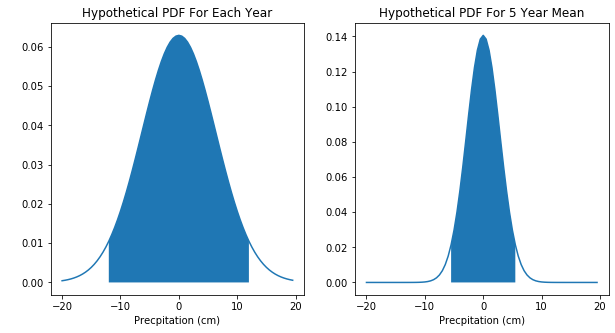

In [34]:
#figure 17

fig17,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
x = np.arange(-20,20,0.5) 
y = stats.norm.pdf(x, 0, ps) 
z0 = - 1.96 * ps 
z1 =  1.96 * ps 
print(z0,z1)
cond = (z0<x)&(x<z1) 
z = x[cond] 
ax1.plot(x, y) 
ax1.set(xlabel="Precpitation (cm)",ylabel=' ') 
ax1.fill_between(z, 0, stats.norm.pdf(z, 0, ps)) 
title= "Hypothetical PDF For Each Year" 
ax1.set_title(title)

y5 = stats.norm.pdf(x, 0, ps5) 
z0 =  -1.96 * ps5 
z1 =  1.96 * ps5 
print(z0,z1)
cond = (z0<x)&(x<z1) 
z = x[cond] 
ax2.plot(x, y5) 
ax2.set(xlabel="Precpitation (cm)",ylabel=' ') 
ax2.fill_between(z, 0, stats.norm.pdf(z, 0, ps5)) 
title= "Hypothetical PDF For 5 Year Mean" 
ax2.set_title(title)


plt.savefig('figure_3.17_2019_python.png')

In [35]:
# get 5 year samples 
Np = len(yearp)
pm=np.zeros(Np)
ps=np.zeros(Np)
pt=np.zeros(Np)
pp=np.zeros(Np)
p_1side_pass=np.zeros(Np)
p_2side_pass=np.zeros(Np)
for i in np.arange(2,Np-2):
    for j in np.arange(i-2,i+3):
        psam=ppta[i-2:i+3]
        
    print(yearp[i],psam)
    pm[i]=np.mean(psam)
    ps[i]=np.std(psam)
    #do 2-sided t-test. One sided is p/2
    pt[i],pp[i]=stats.ttest_1samp(psam,0.0)
    # is the t value negative and is the p value for this 2-sided test < 10% (1-sided < 5%)
    if pt[i]<0:
        if pp[i]<0.10:
            p_1side_pass[i]=1 
    # i is the p value for this 2-sided test < 5%)
    if pp[i]<0.05:
        p_2side_pass[i]=1  
    print(yearp[i],pm[i],ps[i],pt[i],pp[i],p_1side_pass[i],p_2side_pass[i])

1897.0 [-3.84256935 -4.12196935  6.85083065 -5.46816935 -2.29316935]
1897.0 -1.7750093548387156 4.429358009283059 -0.8014747740501655 0.46776441472305885 0.0 0.0
1898.0 [ -4.12196935   6.85083065  -5.46816935  -2.29316935 -10.01476935]
1898.0 -3.009449354838716 5.551498749130722 -1.084193473090469 0.33925773206004595 0.0 0.0
1899.0 [  6.85083065  -5.46816935  -2.29316935 -10.01476935  -5.79836935]
1899.0 -3.3447293548387145 5.658162288800135 -1.1822670273913245 0.3025778295208284 0.0 0.0
1900.0 [ -5.46816935  -2.29316935 -10.01476935  -5.79836935  -8.33836935]
1900.0 -6.382569354838713 2.642674396894176 -4.830386492062646 0.008458904626323017 1.0 1.0
1901.0 [ -2.29316935 -10.01476935  -5.79836935  -8.33836935  -5.36656935]
1901.0 -6.3622493548387125 2.650007696894482 -4.801683679858416 0.008637536452738404 1.0 1.0
1902.0 [-10.01476935  -5.79836935  -8.33836935  -5.36656935  -3.00436935]
1902.0 -6.504489354838713 2.4384211665747983 -5.335000732441507 0.005945230885659548 1.0 1.0
1903.0 

2013.0 0.04871064516128598 4.11446759151169 0.02367773913775769 0.9822437694941548 0.0 0.0
2014.0 [-6.99216935 -0.64216935 -0.31196935  5.02203065 -0.10876935]
2014.0 -0.6066093548387144 3.8155703812667383 -0.3179652289036404 0.7664192387128856 0.0 0.0
2015.0 [-0.64216935 -0.31196935  5.02203065 -0.10876935  1.46603065]
2015.0 1.0850306451612852 2.097861638907581 1.0344158308994038 0.35937843685934695 0.0 0.0
2016.0 [-0.31196935  5.02203065 -0.10876935  1.46603065  0.19603065]
2016.0 1.2526706451612852 1.9835172090002147 1.2630801885431484 0.27516934828250905 0.0 0.0


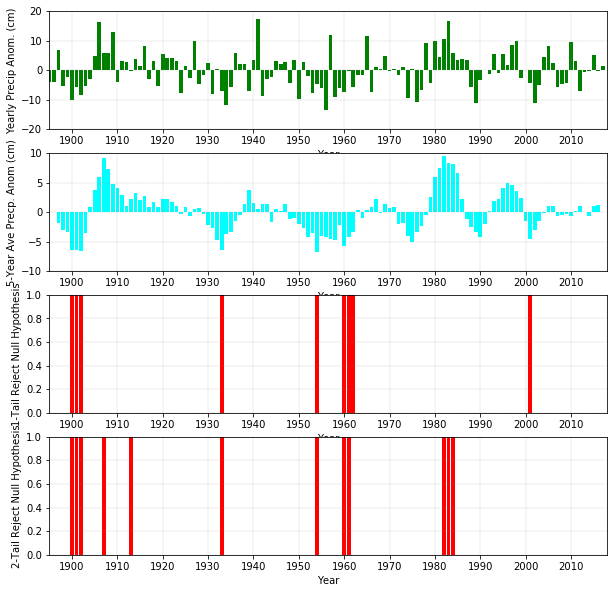

In [36]:
#figure 18
fig,(ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(10,10))
ax1.bar(yearp,ppta,color='green')
ax1.set(xlim=(1895,2018),ylim=(-20,20))
ax1.set(xlabel="Year",ylabel='Yearly Precip Anom. (cm)')
ax1.set(xticks=decade_ticks)
ax2.bar(yearp,pm,color='cyan')
ax2.set(xlim=(1895,2018),ylim=(-10,10))
ax2.set(xlabel="Year",ylabel='5-Year Ave Precp. Anom (cm)')
ax2.set(xticks=decade_ticks)
ax3.bar(yearp,p_1side_pass,color='red')
ax3.set(xlim=(1895,2018),ylim=(0,1))
ax3.set(xlabel="Year",ylabel='1-Tail Reject Null Hypothesis')
ax3.set(xticks=decade_ticks)
ax4.bar(yearp,p_2side_pass,color='red')
ax4.set(xlim=(1895,2018),ylim=(0,1))
ax4.set(xlabel="Year",ylabel='2-Tail Reject Null Hypothesis')
ax4.set(xticks=decade_ticks)

ax1.grid(linestyle='--', color='grey', linewidth=.2)
ax2.grid(linestyle='--', color='grey', linewidth=.2)
ax3.grid(linestyle='--', color='grey', linewidth=.2)
ax4.grid(linestyle='--', color='grey', linewidth=.2)

plt.savefig('figure_3.18_2019_python.png')